#**DECISION TREE**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

importing required libraries

## 1. Data Preparation:

In [ ]:
df = pd.read_csv("/content/heart_disease.1.csv")

Loading the data set

In [ ]:
df.head()

age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  FALSE      2.3  downsloping  fixed defect    0  
1  FALSE      0.0         flat  fixed defect    0  
2  FALSE      0.4         flat  fixed defect    0  
3  FALSE      0.0         flat  fixed defect    0  
4   TRUE      1.5         flat  fixed defect    0

Displays the first five rows of the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


Displays datatypes of each variables

##2. Exploratory Data Analysis (EDA):

In [ ]:

# Step 1: Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())

# Step 2: Check for duplicate rows
print("\n Duplicate Rows:", df.duplicated().sum())

# Step 3: Summary statistics
print("\n Summary Statistics:")
print(df.describe())







 Missing Values:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

 Duplicate Rows: 0

 Summary Statistics:
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


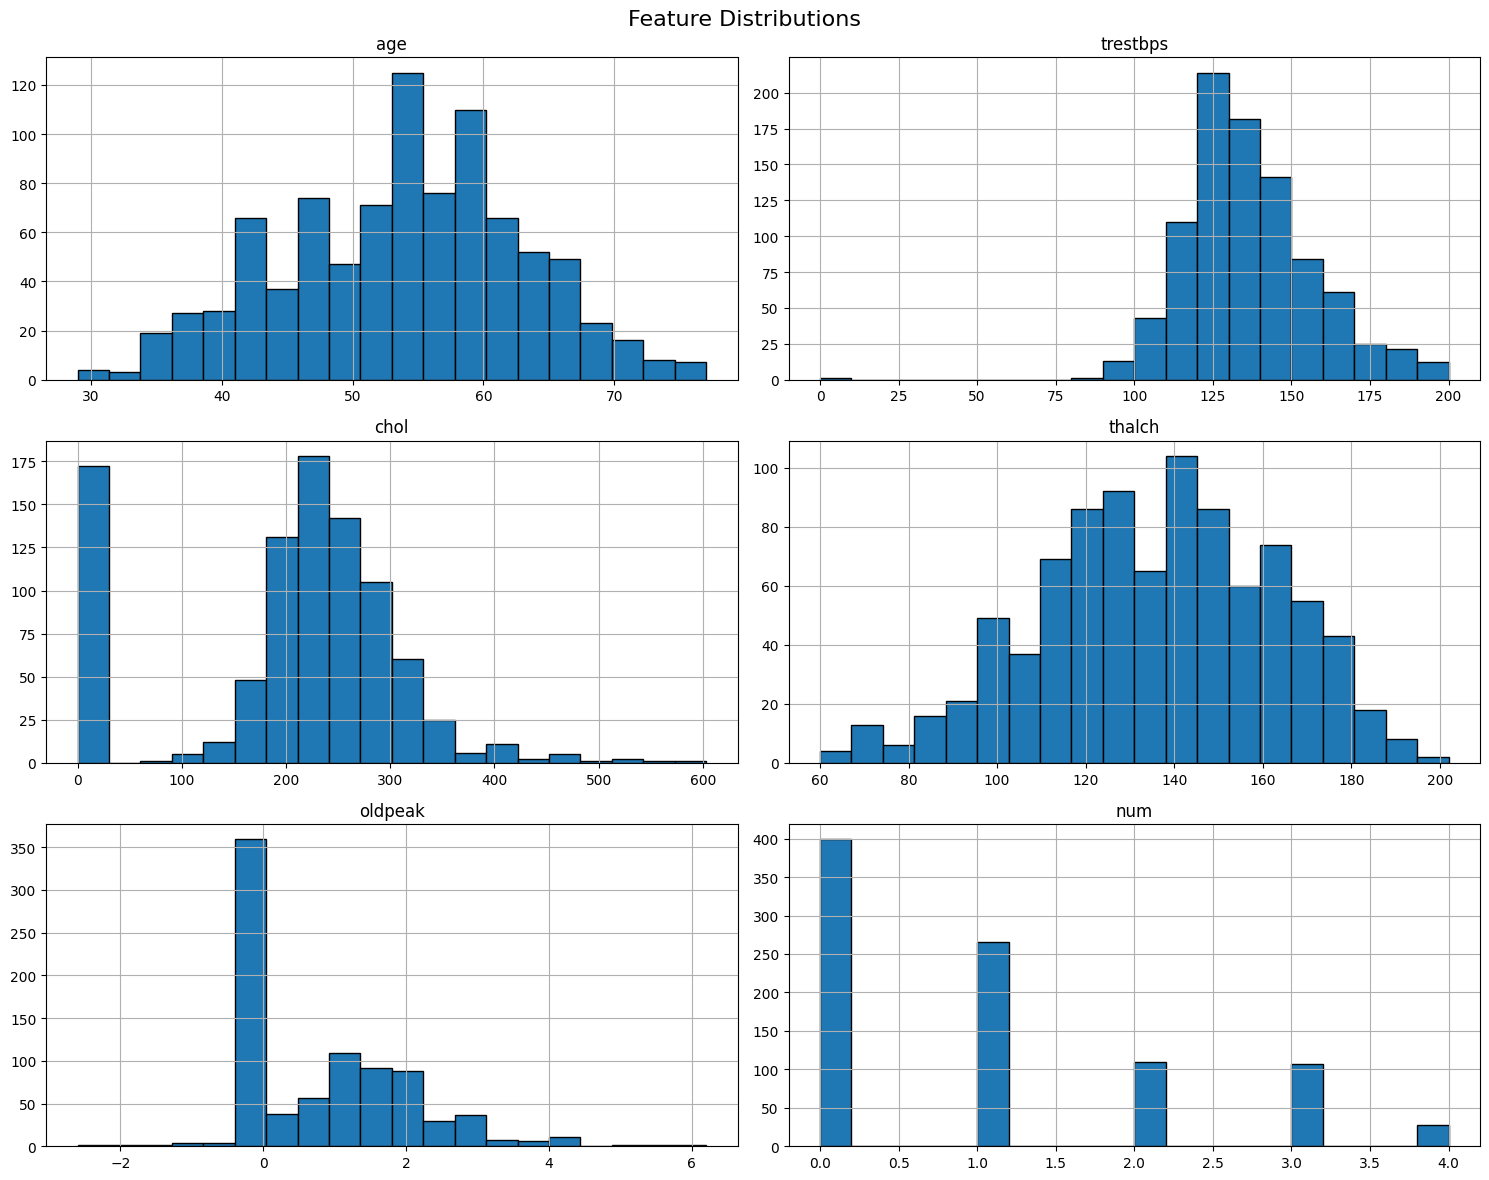

In [ ]:
# Step 4: Histograms – Distribution of each feature
df.hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

Generates histograms to display the distribution of each feature in a DataFrame, with a figure size of 15x12 inches, 20 bins, and black edges. It sets a main title "Feature Distributions," adjusts the layout for clarity, and displays the plots to visualize the data distributions.

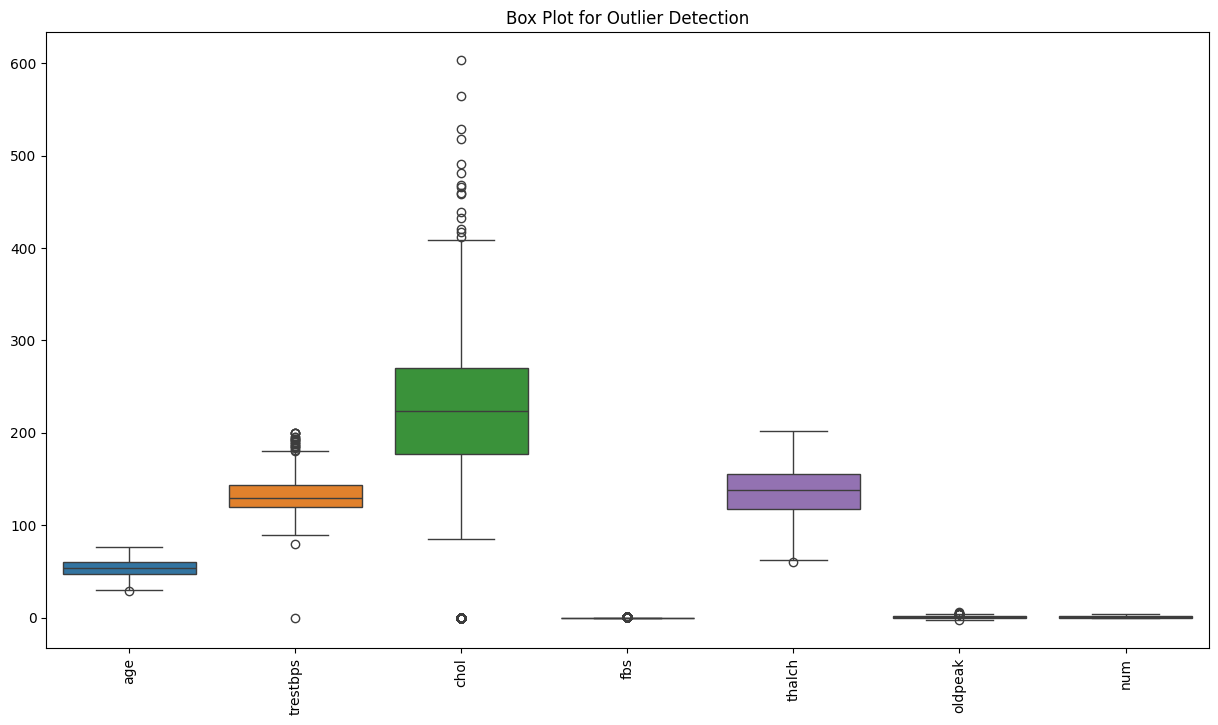

In [ ]:

# Step 5: Box plots – Check for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Box Plot for Outlier Detection")
plt.show()

Creates box plots to identify outliers in the data, with a figure size of 15x8 inches. The box plots are generated using Seaborn, rotated labels for clarity, and titled "Box Plot for Outlier Detection," allowing visual inspection of potential anomalies in the dataset.

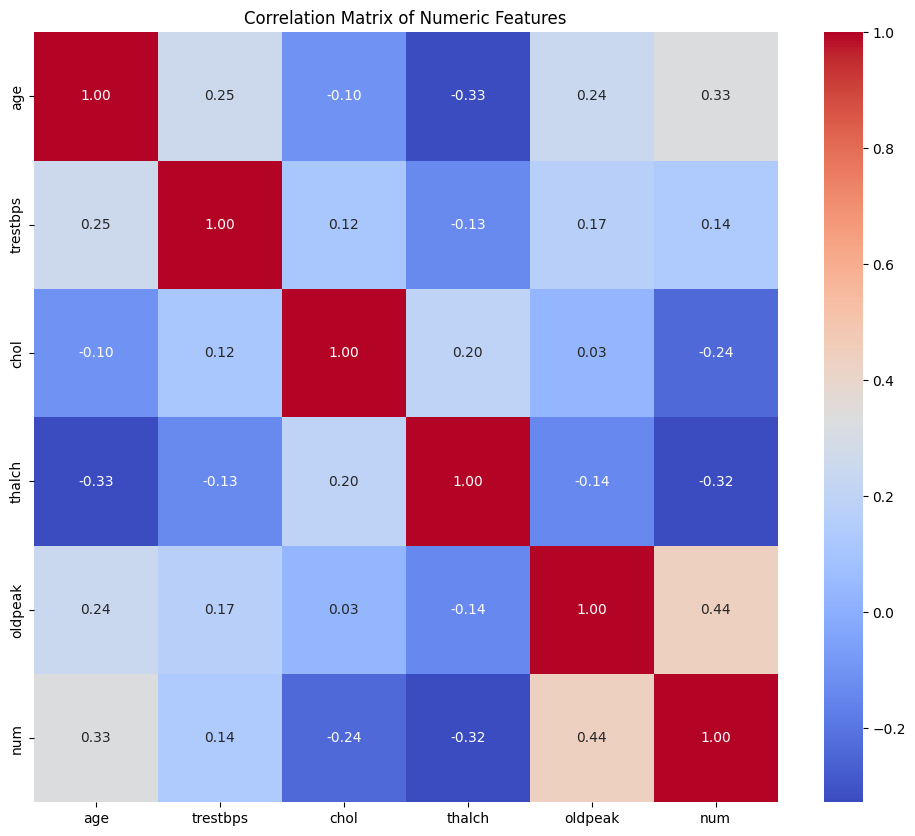

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Check if it's empty
if numeric_df.empty:
    print("⚠️ No numeric columns available for correlation.")
else:
    # Correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix of Numeric Features")
    plt.show()

Selects only numeric columns from the dataset and checks if any are available. If numeric data exists, it computes and visualizes a correlation matrix using a heatmap with annotations, a color palette, and a title indicating it displays the correlations among numeric features. If no numeric columns are found, it issues a warning message.

##3. Feature Engineering:

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include='object').columns

# Create a copy to avoid modifying the original DataFrame
df_clean = df.copy()

# Fill missing values for numerical columns with the mean
df_clean[numerical_cols] = df_clean[numerical_cols].fillna(df_clean[numerical_cols].mean())

# Fill missing values for categorical columns with the mode
for col in categorical_cols:
    # Calculate mode before filling to avoid issues with mixed types
    mode_value = df_clean[col].mode()[0]
    df_clean[col] = df_clean[col].fillna(mode_value)


Separates numerical and categorical columns in the dataset. It creates a copy of the DataFrame to preserve the original and fills missing values in numerical columns with their mean, while missing categorical values are filled with the mode. This process prepares the dataset for further analysis by handling missing data appropriately.

In [ ]:
df_clean.shape

(908, 13)

In [ ]:
# 2. Encode categorical variables
label_encoders = {}
for col in df_clean.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le  # Store encoder if needed for inverse transform



Encodes categorical variables in the dataset using label encoding, transforming object-type columns into numerical format. It stores each encoder in a dictionary for potential inverse transformation later, facilitating machine learning model compatibility.



In [ ]:
# 3. Scale numerical features (optional but useful for some models)
scaler = StandardScaler()
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.drop('num', errors='ignore')

df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])



Scales numerical features in the dataset using standardization, which transforms the data to have a mean of zero and a standard deviation of one. This step enhances model performance, especially for algorithms sensitive to feature scales, by applying the scaler to numerical columns in the cleaned dataset.

##4. Decision Tree Classification:

In [ ]:
from sklearn.model_selection import train_test_split

# Convert multi-class target to binary: 0 = no disease, 1 = has disease
df_clean['target'] = df_clean['num'].apply(lambda x: 1 if x > 0 else 0)
# Drop the original 'num' column and use the new 'target'
X = df_clean.drop(['num', 'target'], axis=1)
y = df_clean['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(" Train shape:", X_train.shape)
print(" Test shape:", X_test.shape)

 Train shape: (726, 12)
 Test shape: (182, 12)


Transforms a multi-class target variable into a binary target indicating the presence or absence of disease, then drops the original target column. It splits the dataset into training and testing sets with an 80-20 ratio, stratifying by the target to maintain class distribution, and outputs the shapes of the resulting datasets for model training and evaluation.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

 Initializes a decision tree classifier with a fixed random seed for reproducibility and trains the model using the training dataset, preparing it for making predictions on new data

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, confusion_matrix
)

# Predict
y_pred = dt_model.predict(X_test)

# Evaluation Metrics
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Precision:", precision_score(y_test, y_pred))
print(" Recall:", recall_score(y_test, y_pred))
print(" F1 Score:", f1_score(y_test, y_pred))
print(" ROC-AUC:", roc_auc_score(y_test, y_pred))



 Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.68      0.68        80
           1       0.75      0.76      0.76       102

    accuracy                           0.73       182
   macro avg       0.72      0.72      0.72       182
weighted avg       0.72      0.73      0.72       182

 Accuracy: 0.7252747252747253
 Precision: 0.75
 Recall: 0.7647058823529411
 F1 Score: 0.7572815533980582
 ROC-AUC: 0.7198529411764706


Evaluates the performance of the trained decision tree model on the test dataset using various metrics, including accuracy, precision, recall, F1 score, and ROC-AUC. It also generates a detailed classification report and displays these metrics to assess the model's effectiveness in predicting the binary target.

##5. Hyperparameter Tuning:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize model
dt = DecisionTreeClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best model
best_dt = grid_search.best_estimator_

print(" Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
 Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


Sets up a grid search for hyperparameter tuning of a decision tree model, defining parameters such as maximum depth, minimum samples split, and splitting criterion. After fitting the grid search, it identifies the best model and outputs the optimal hyperparameters.

In [ ]:
# Predict with tuned model
y_pred_best = best_dt.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

print("\n Tuned Model Report:")
print(classification_report(y_test, y_pred_best))
print(" Accuracy:", accuracy_score(y_test, y_pred_best))
print(" ROC-AUC:", roc_auc_score(y_test, y_pred_best))



 Tuned Model Report:
              precision    recall  f1-score   support

           0       0.66      0.74      0.69        80
           1       0.77      0.70      0.73       102

    accuracy                           0.71       182
   macro avg       0.71      0.72      0.71       182
weighted avg       0.72      0.71      0.72       182

 Accuracy: 0.7142857142857143
 ROC-AUC: 0.7167892156862745


Uses the best-tuned decision tree model to make predictions on the test dataset and evaluates its performance. It generates a classification report, accuracy, and ROC-AUC score to assess the effectiveness of the optimized model in predicting the binary target.

##6. Model Evaluation and Analysis:

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

print(" Classification Report:\n", classification_report(y_test, y_pred_best))
print(" Accuracy:", accuracy_score(y_test, y_pred_best))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_pred_best))


 Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.74      0.69        80
           1       0.77      0.70      0.73       102

    accuracy                           0.71       182
   macro avg       0.71      0.72      0.71       182
weighted avg       0.72      0.71      0.72       182

 Accuracy: 0.7142857142857143
 ROC-AUC Score: 0.7167892156862745


Displays the performance metrics of the best-tuned model, including a detailed classification report, accuracy score, and ROC-AUC score, to evaluate its effectiveness in predicting the binary target variable on the test dataset.

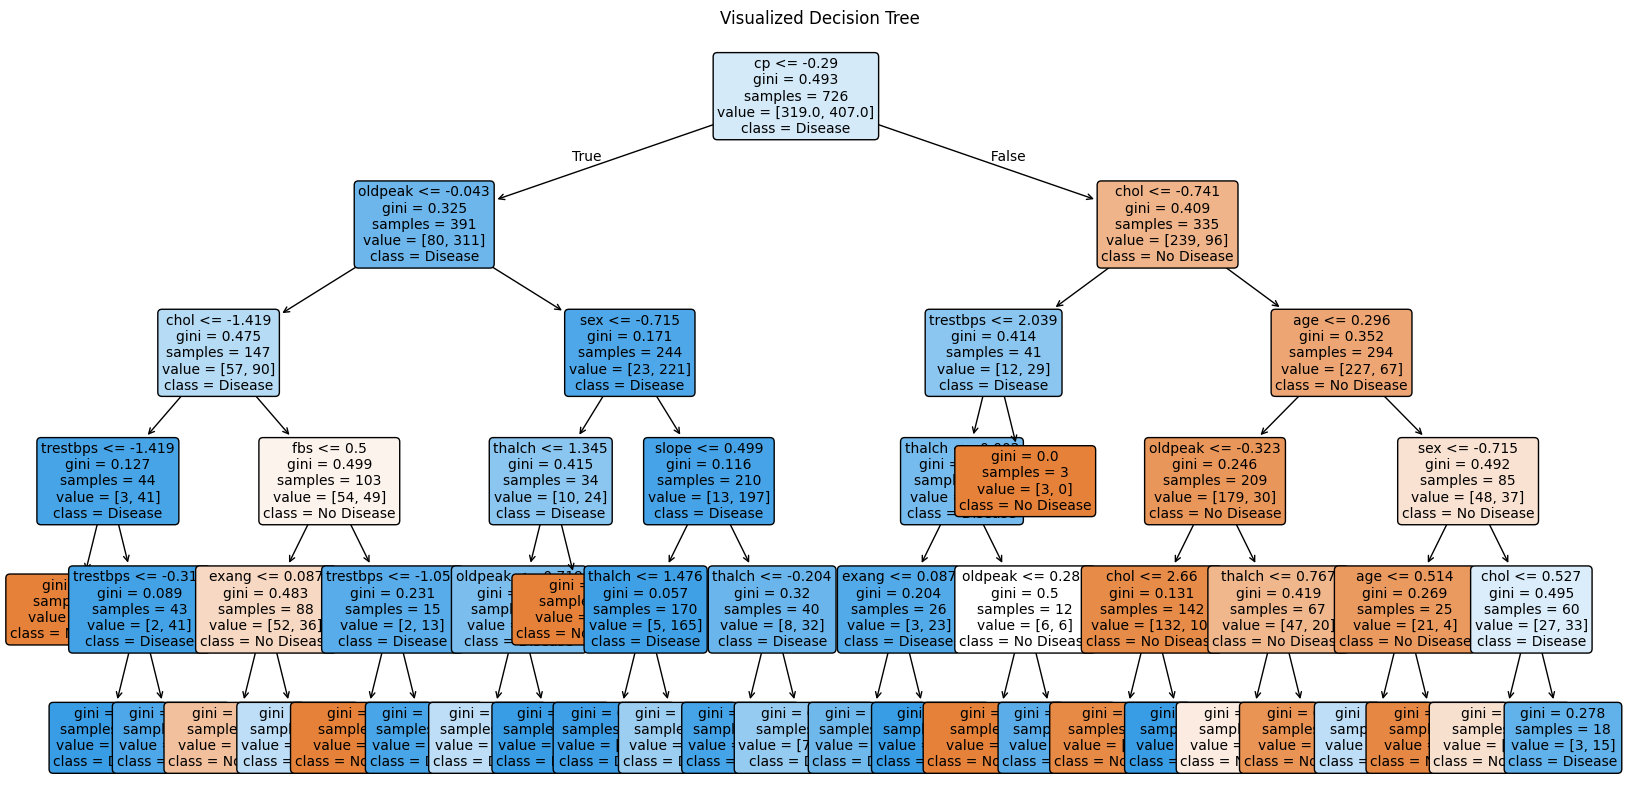

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_dt,
          feature_names=X.columns,
          class_names=['No Disease', 'Disease'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Visualized Decision Tree")
plt.show()


Visualizes the best decision tree model using a plot that displays features, decision nodes, and class labels, providing a clear, filled, and rounded diagram of the tree structure to facilitate understanding of the model's decision-making process.



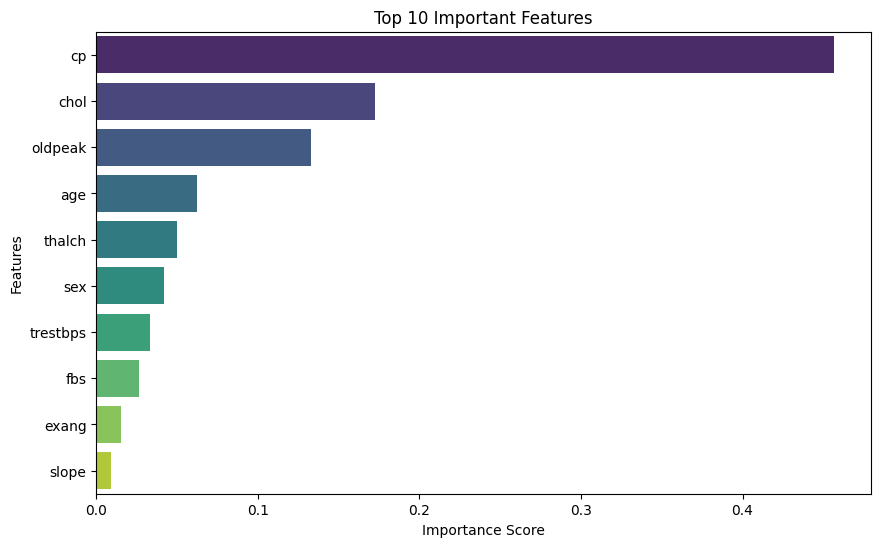

In [ ]:
import pandas as pd
import seaborn as sns

# Extract and sort feature importances
feat_importances = pd.Series(best_dt.feature_importances_, index=X.columns)
top_features = feat_importances.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index, palette='viridis')
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


 Extracts and sorts the feature importance scores from the best decision tree model, identifies the top 10 most important features, and visualizes their importance using a horizontal bar plot with a viridis color palette, highlighting the most influential features in the model.

#**Interview Questions:**

##1.What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Decision tree models have several important hyperparameters that directly influence their performance. One of the key hyperparameters is max_depth, which sets the maximum depth the tree can grow. Limiting the depth helps prevent overfitting by controlling model complexity. Another crucial parameter is min_samples_split, which defines the minimum number of samples required to split an internal node. Increasing this value makes the tree more conservative and less prone to overfitting. Similarly, min_samples_leaf specifies the minimum number of samples required to be at a leaf node, ensuring that the model doesn't create branches that are too specific to noise in the training data.

The criterion hyperparameter determines how the decision tree chooses the best split. It can be either 'gini' (Gini impurity) or 'entropy' (information gain). Both aim to measure the quality of a split, but they use different mathematical approaches. Another useful parameter is max_features, which limits the number of features considered for splitting at each node; this can reduce overfitting and training time. Lastly, the random_state parameter ensures reproducibility by fixing the random behavior of the model, which is especially important during model evaluation and tuning.

##2. What is the difference between Label Encoding and One-hot Encoding?

Label encoding and one-hot encoding are two common techniques used to convert categorical variables into numerical format for machine learning models. Label encoding assigns a unique integer to each category in a feature. For example, a color feature with values red, blue, and green might be encoded as 0, 1, and 2. This method is simple and memory-efficient, but it introduces an implicit ordinal relationship between categories, which can be misleading if no such relationship exists.

On the other hand, one-hot encoding creates a new binary column for each category in a feature. Each row will have a 1 in the column corresponding to its category and 0 elsewhere. This avoids any unintended ordinal relationships and is more appropriate for nominal data where categories are distinct and unordered. However, one-hot encoding can increase the dimensionality of the dataset, especially when applied to features with many unique values. Choosing between these methods depends on the nature of the categorical variable and the algorithm being used.